### Question 1: Implement the MNIST learning and inference program by following the 9th lecture’s slides (copy the program on the slide), and submit the program (.py) and the execution results displayed on the console in a word file.

In [1]:
!pip install torch
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.2.2-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata

In [2]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision as tv

#download data
train_set = MNIST(root = './', train=True, transform= tv.transforms.ToTensor(), download=True)
test_set = MNIST(root = './', train=False, transform= tv.transforms.ToTensor(), download=True)

0.3%

100.0%


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100.0%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




2.0%

100.0%


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100.0%

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
#load
train_loader = DataLoader(dataset=train_set, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

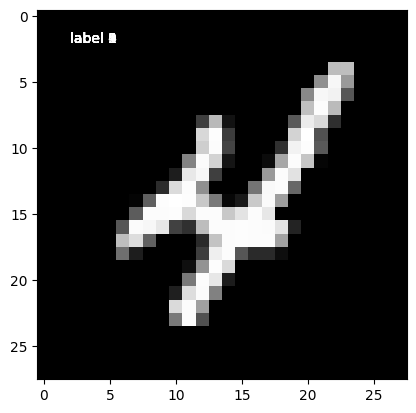

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
  print(train_set[i])
  plt.imshow(train_set[i][0][0], cmap='gray')
  txt = "label {}".format(train_set[i][1])
  plt.text(2,2,txt,color='white')

In [5]:
import torch
import torch.nn.functional as F

#build model 2 layers
l1 = torch.nn.Linear(784, 300)
l2 = torch.nn.Linear(300, 10)

param = list(l1.parameters()) + list(l2.parameters())

optimizer = torch.optim.Adam(param)

def neural_network_model(x):
  h = F.relu(l1(x))
  y = l2(h)
  return y

In [6]:
import time
start_time = time.time()

epoch = 10

def train():
  for e in range(epoch):
    loss = 0
    for img, lab in train_loader:
      img = img.view(-1, 28 * 28)
      optimizer.zero_grad()  #Initialize gradient
      y = neural_network_model(img)  #update weigh

      BatchLoss = F.cross_entropy(y, lab)  #loss_function
      BatchLoss.backward()  #loop 
      optimizer.step()

      loss = loss + BatchLoss.item() #loss value

    print("epoch: {}, loss: {}".format(e, loss))

train()

print("{} completed".format(time.time()-start_time))

epoch: 0, loss: 197.9063133597374
epoch: 1, loss: 83.15249215066433
epoch: 2, loss: 55.76256328355521
epoch: 3, loss: 40.62344552204013
epoch: 4, loss: 30.993554384447634
epoch: 5, loss: 23.435892120935023
epoch: 6, loss: 18.753456947626546
epoch: 7, loss: 14.884301490732469
epoch: 8, loss: 11.341941411606967
epoch: 9, loss: 8.433220443082973
56.99104690551758 completed


In [7]:
#test

correct = 0
total = len(test_loader.dataset)
for images, labels in test_loader:
  images = images.view(-1, 28*28)
  y = neural_network_model(images)
  pred_labels = y.max(dim=1)[1]
  correct = correct + (pred_labels == labels).sum()

print("correct: ",correct.item())
print("total: ",total)
print("accuracy: ",correct.item()/total)

correct:  9803
total:  10000
accuracy:  0.9803


### Question 2: The MNIST learning and inference program in the 9th lecture’s slides had an intermediate layer of 300 dimensions. Change the intermediate layer to 800 dimensions, and submit the program (.py) and the execution results shown in the console in a word file. (The error will be greatly reduced compared to the 300-dimensional case. The accuracy will be slightly better, but almost the same.)

In [8]:
import torch
import torch.nn.functional as F

#build model 2 layers
L1 = torch.nn.Linear(784, 800)
L2 = torch.nn.Linear(800, 10)

param1 = list(L1.parameters()) + list(L2.parameters())

optimizer1 = torch.optim.Adam(param1)

def neural_network_model_1(x):
  h = F.relu(L1(x))
  y = L2(h)
  return y

In [9]:
import time
start_time = time.time()

epoch = 10

def train():
  for e in range(epoch):
    loss = 0
    for images, labels in train_loader:
      images = images.view(-1, 28*28)
      optimizer1.zero_grad()  #Initialize gradient
      y = neural_network_model_1(images)  #update weigh

      batchloss = F.cross_entropy(y, labels)  #loss_function
      batchloss.backward()  #loop 
      optimizer1.step()

      loss = loss + batchloss.item() #loss value

    print("epoch: {}, loss: {}".format(e, loss))

train()

print("{} completed".format(time.time()-start_time))

epoch: 0, loss: 160.87653237208724
epoch: 1, loss: 62.20524583756924
epoch: 2, loss: 39.639318469911814
epoch: 3, loss: 27.653425252297893
epoch: 4, loss: 19.56635378487408
epoch: 5, loss: 15.020197865087539
epoch: 6, loss: 11.015751677099615
epoch: 7, loss: 8.47613039065618
epoch: 8, loss: 6.770076379791135
epoch: 9, loss: 5.015536817256361
83.49245190620422 completed


In [10]:
#test

correct = 0
total = len(test_loader.dataset)
for images, labels in test_loader:
  images = images.view(-1, 28*28)
  y = neural_network_model_1(images)
  pred_labels = y.max(dim=1)[1]
  correct = correct + (pred_labels == labels).sum()

print("correct: ",correct.item())
print("total: ",total)
print("accuracy: ",correct.item()/total)

correct:  9795
total:  10000
accuracy:  0.9795
